# Understanding our Data
Before doing anything on the data we need to get basic information on the data

In [1]:
import pandas as pd
import numpy as np
import datetime 

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import scipy.stats
from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv

In [3]:
import seaborn as sns

In [4]:
# to clean up the data i will make the Unnamed: 0 column as my unique index.
df = pd.read_csv('data/tmdb.movies.csv', index_col='Unnamed: 0')
df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [5]:
df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


# Now i want to get important columns and cleaning the data

In [7]:
# replacing zeros with numpy NaN

df['popularity'] = df['popularity'].replace(0, np.nan)

df['vote_average'] = df['vote_average'].replace(0, np.nan)

df['vote_count'] = df['vote_count'].replace(0, np.nan)

# getting only the year in release_date to make things simpler

# Coercion is the implicit conversion of an instance of one type to another 
# during an operation which involves two arguments of the same type.
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-') 
                                                                       [0] if x != np.nan else np.nan)

In [8]:
df['vote_count'] = df['vote_count'].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26381 non-null  float64
 8   vote_count         26517 non-null  float64
 9   year               26517 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.2+ MB


# Lets get to cleaning.
one problem with the dataframe is that some columnsgs are not very usable for analysis. this is melting each row into multiple ones, each of which represent a single ranking. 

for simplicity i will work with a subset of the columns. 

In [10]:
# creating a new dataframe, double brackets to select the columns i want.
new_df = df[['id', 'title', 'popularity', 'vote_average', 'vote_count', 'year']]

In [11]:
new_df.head()

,id,title,popularity,vote_average,vote_count,year
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788.0,2010
1,10191,How to Train Your Dragon,28.734,7.7,7610.0,2010
2,10138,Iron Man 2,28.515,6.8,12368.0,2010
3,862,Toy Story,28.005,7.9,10174.0,1995
4,27205,Inception,27.920,8.3,22186.0,2010


In [12]:
new_df.sort_values(['id', 'title', 'popularity', 'vote_average'])
new_df.head(10)

,id,title,popularity,vote_average,vote_count,year
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788.0,2010
1,10191,How to Train Your Dragon,28.734,7.7,7610.0,2010
2,10138,Iron Man 2,28.515,6.8,12368.0,2010
3,862,Toy Story,28.005,7.9,10174.0,1995
4,27205,Inception,27.920,8.3,22186.0,2010
5,32657,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,4229.0,2010
6,19995,Avatar,26.526,7.4,18676.0,2009
7,10193,Toy Story 3,24.445,7.7,8340.0,2010
8,20352,Despicable Me,23.673,7.2,10057.0,2010
9,38055,Megamind,22.855,6.8,3635.0,2010


In [13]:
# analyse the popularity and vote_average aspects below.
new_df[new_df['popularity'].notnull()][['id','title','popularity', 'vote_average', 'vote_count', 'year']].sort_values('popularity',
                                                                                                                 ascending=False).head(10)

# Below is the Top 10 movies with Highest popularity. 

,id,title,popularity,vote_average,vote_count,year
23811,299536,Avengers: Infinity War,80.773,8.3,13948.0,2018
11019,245891,John Wick,78.123,7.2,10081.0,2014
23812,324857,Spider-Man: Into the Spider-Verse,60.534,8.4,4048.0,2018
11020,122917,The Hobbit: The Battle of the Five Armies,53.783,7.3,8392.0,2014
5179,24428,The Avengers,50.289,7.6,19673.0,2012
11021,118340,Guardians of the Galaxy,49.606,7.9,17958.0,2014
20617,335984,Blade Runner 2049,48.571,7.4,6679.0,2017
23813,335984,Blade Runner 2049,48.571,7.4,6679.0,2017
23814,338952,Fantastic Beasts: The Crimes of Grindelwald,48.508,6.9,4870.0,2018
23815,404368,Ralph Breaks the Internet,48.057,7.2,2626.0,2018


In [14]:
# You can get Movies with lowest popularity by just replacing head() with tail()
new_df[new_df['popularity'].notnull()][['id','title','popularity', 'vote_average', 'vote_count', 'year']].sort_values('popularity',
                                                                                                                 ascending=False).tail(10)

,id,title,popularity,vote_average,vote_count,year
13872,408529,Cooped,0.6,5.0,1.0,2014
13873,407998,Platonic Solid,0.6,5.0,1.0,2014
13874,406698,The Scanners Way: Creating the Special Effects...,0.6,5.0,1.0,2014
13875,406339,L Word Mississippi: Hate the Sin,0.6,5.0,1.0,2014
13876,402224,Send,0.6,5.0,1.0,2014
13877,401741,Crème Caramel,0.6,5.0,1.0,2014
13878,401427,Elegy,0.6,5.0,1.0,2014
13879,399054,Jaguar,0.6,5.0,1.0,2014
13880,381154,Unleashed! A Dog Dancing Story,0.6,5.0,1.0,2014
26516,309885,The Church,0.6,NaN,1.0,2018


<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

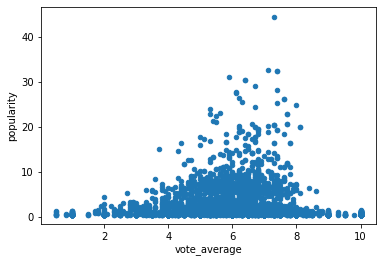

In [15]:
new_df[new_df.year == "2015"].plot.scatter('vote_average', 'popularity')

# Now I will focus on Vote Count, Vote average and Popularity of movies.

 Get Top 10 Movies with Most vote counts and Max vote average.

In [16]:
# movies with max vote count
new_df[new_df['vote_count'].notnull()][['id','title','popularity','vote_count','year']].sort_values('vote_count',
                                                                                            ascending=False).head(10)

# below i can see that Inception comes in first place with 22,186 votes!

,id,title,popularity,vote_count,year
4,27205,Inception,27.920,22186.0,2010
17383,293660,Deadpool,35.067,20175.0,2016
5179,24428,The Avengers,50.289,19673.0,2012
6,19995,Avatar,26.526,18676.0,2009
11032,157336,Interstellar,28.440,18597.0,2014
11021,118340,Guardians of the Galaxy,49.606,17958.0,2014
5189,68718,Django Unchained,21.260,15725.0,2012
5235,70160,The Hunger Games,14.212,14587.0,2012
14177,76341,Mad Max: Fury Road,28.099,14454.0,2015
7881,68721,Iron Man 3,32.093,14155.0,2013


In [17]:
# While extracting vote_average i need to consider movies with atleast 3000 votes to be a fare data.
# movies with highest vote_average
new_df[new_df['vote_count'] > 3000][['id','title','popularity','vote_average','year']].sort_values('vote_average',
                                                                                            ascending=False).head(10)
# here i have Your Name as at the top of the list.
# i can also see duplicates, but i noticed that the index's are different so i might not-
# want to drop them yet. 

,id,title,popularity,vote_average,year
17389,372058,Your Name.,28.238,8.6,2017
20632,372058,Your Name.,28.238,8.6,2017
23861,424,Schindler's List,25.334,8.5,1993
20626,129,Spirited Away,32.043,8.5,2002
14173,129,Spirited Away,32.043,8.5,2002
11031,244786,Whiplash,28.784,8.4,2014
23812,324857,Spider-Man: Into the Spider-Verse,60.534,8.4,2018
23827,490132,Green Book,36.284,8.3,2018
20660,398818,Call Me by Your Name,20.504,8.3,2017
23811,299536,Avengers: Infinity War,80.773,8.3,2018


In [18]:
# get the most popular movies of all time. 
new_df[new_df['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).head(10)


,title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23813,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057


In [19]:
# get the least popular movies of all time. 
new_df[new_df['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).tail(10)

,title,popularity
13872,Cooped,0.6
13873,Platonic Solid,0.6
13874,The Scanners Way: Creating the Special Effects...,0.6
13875,L Word Mississippi: Hate the Sin,0.6
13876,Send,0.6
13877,Crème Caramel,0.6
13878,Elegy,0.6
13879,Jaguar,0.6
13880,Unleashed! A Dog Dancing Story,0.6
26516,The Church,0.6


# Data Frame 2

which studio makes the most money by year?

In [21]:
df2 = pd.read_csv('data/bom.movie_gross.csv')
df2.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
# drop duplicate values
df2.drop_duplicates(inplace=True)

In [24]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB


In [25]:
df2.dropna(subset=['foreign_gross'], inplace=True)

In [26]:
# replacing zeros with numpy NaN
df2['domestic_gross'] = df2['domestic_gross'].replace(0, np.nan)

In [27]:
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [29]:
# have to convert 'foreign_gross' to numeric because right now its a list
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')

In [30]:
df2.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [31]:
df2.info()
# everything is in the data types i want.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.5+ KB


In [32]:
df2[df2['domestic_gross'].notnull()][['title','studio','domestic_gross','foreign_gross','year']].sort_values('domestic_gross',
                                                                                                                 ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018
1873,Jurassic World,Uni.,652300000.0,NaN,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


In [33]:
df2 ['total_gross'] = df2['domestic_gross'] + df2['foreign_gross']

In [34]:
df2.isnull().sum()

title              0
studio             4
domestic_gross    28
foreign_gross      5
year               0
total_gross       33
dtype: int64

In [36]:
df2

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


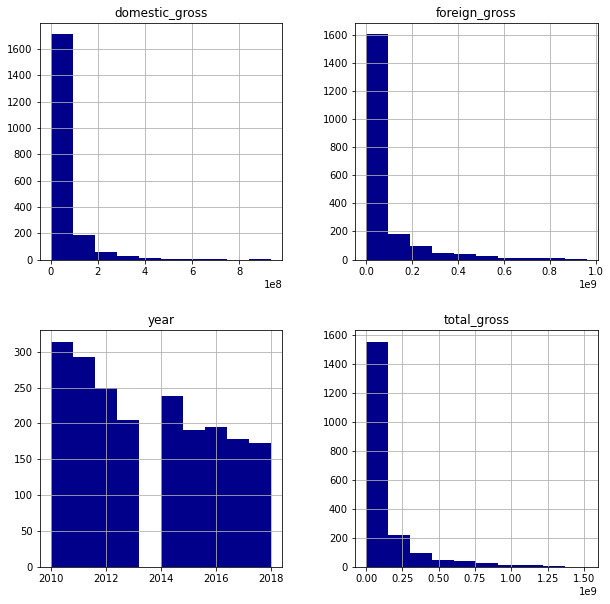

In [37]:
df2.hist(color='DarkBlue',figsize= (10,10));

# domestic, foreign, and total are skewed. 

<AxesSubplot:xlabel='year'>

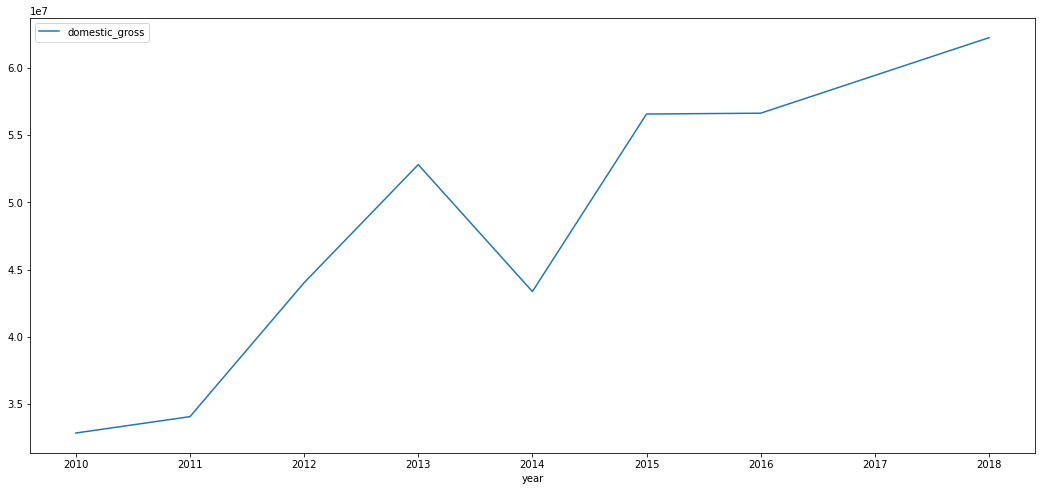

In [38]:
dom_revenue = (df2[df2['domestic_gross'].notnull()][['year', 'domestic_gross']].groupby('year').mean())
dom_revenue.plot(figsize=(18,8))

<AxesSubplot:xlabel='year'>

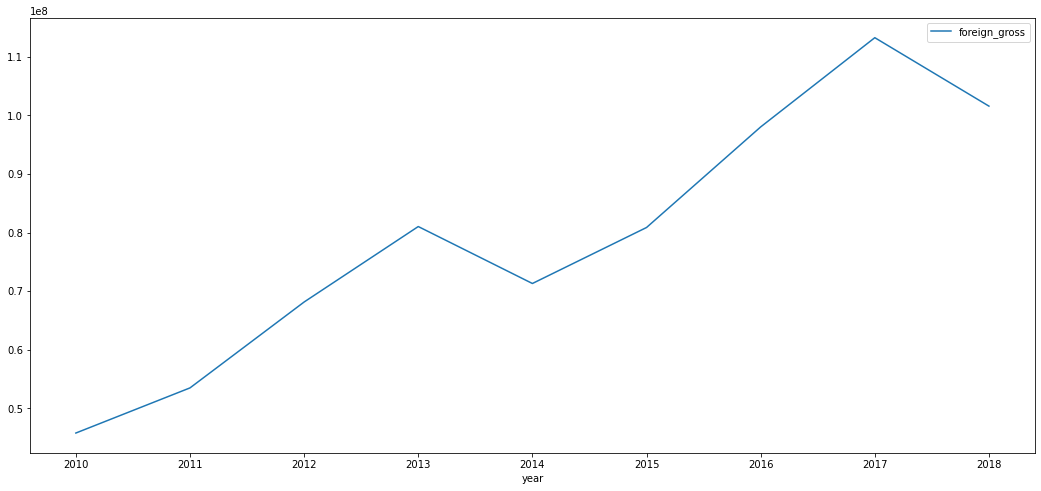

In [39]:
for_revenue = (df2[df2['foreign_gross'].notnull()][['year', 'foreign_gross']].groupby('year').mean())
for_revenue.plot(figsize=(18,8))

<AxesSubplot:xlabel='year'>

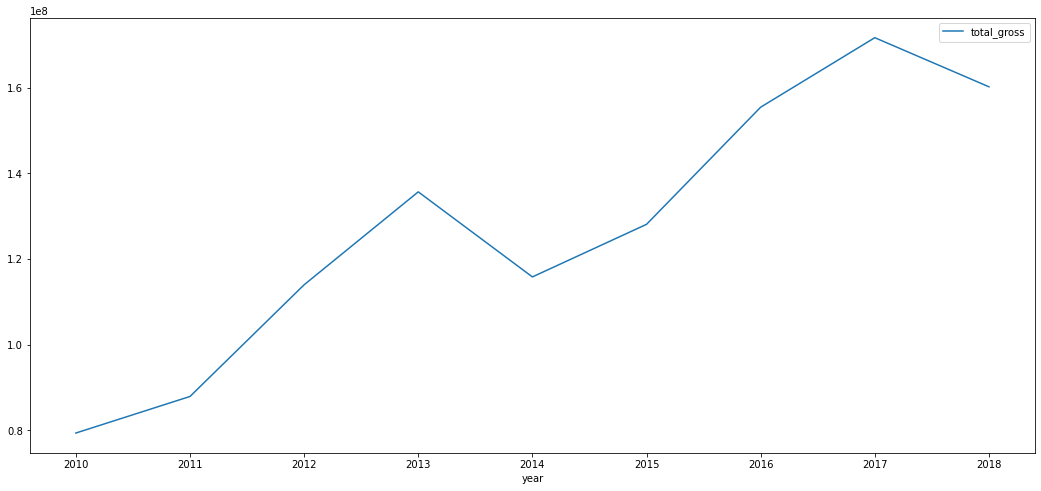

In [48]:
total_revenue = (df2[df2['total_gross'].notnull()][['year', 'total_gross']].groupby('year').mean())
total_revenue.plot(figsize=(18,8))

In [40]:
# the mean values for the domestic gross from years 2010-2018
dom_revenue

,domestic_gross
year,
2010,3.285708e+07
2011,3.407478e+07
2012,4.402413e+07
2013,5.279425e+07
2014,4.336745e+07
2015,5.655194e+07
2016,5.661299e+07
2017,5.941676e+07
2018,6.222173e+07


In [41]:
# the mean values for the foreign gross from years 2010-2018
for_revenue

,foreign_gross
year,
2010,4.577789e+07
2011,5.348459e+07
2012,6.815155e+07
2013,8.103607e+07
2014,7.131079e+07
2015,8.087209e+07
2016,9.804637e+07
2017,1.132821e+08
2018,1.015959e+08


In [49]:
total_revenue

,total_gross
year,
2010,7.937058e+07
2011,8.791040e+07
2012,1.139953e+08
2013,1.356955e+08
2014,1.158318e+08
2015,1.281135e+08
2016,1.554744e+08
2017,1.717028e+08
2018,1.602328e+08


In [50]:
df2.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [51]:
df2.sort_values(by=['domestic_gross', 'title'])

,title,studio,domestic_gross,foreign_gross,year,total_gross
1018,Apartment 143,Magn.,400.0,426000.0,2012,426400.0
2920,Amityville: The Awakening,W/Dim.,700.0,7700000.0,2017,7700700.0
642,Illegal (2011),FM,700.0,289000.0,2011,289700.0
1738,Jackpot,DR,800.0,1100000.0,2014,1100800.0
292,Perrier's Bounty,IFC,800.0,167000.0,2010,167800.0
...,...,...,...,...,...,...
1079,The Green Wave,RF,NaN,70100.0,2012,NaN
1340,The Snitch Cartel,PI,NaN,2100000.0,2013,NaN
928,The Tall Man,Imag.,NaN,5200000.0,2012,NaN
2595,Viral,W/Dim.,NaN,552000.0,2016,NaN


In [52]:
df2.sort_values(by=['foreign_gross', 'title'])

,title,studio,domestic_gross,foreign_gross,year,total_gross
921,Chasing Mavericks,Fox,6000000.0,600.0,2012,6000600.0
721,To Die Like a Man,Strand,4000.0,900.0,2011,4900.0
316,The Red Baron,Mont.,37200.0,3100.0,2010,40300.0
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,189000.0,3500.0,2010,192500.0
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010,NaN
...,...,...,...,...,...,...
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018,NaN
1874,Furious 7,Uni.,353000000.0,NaN,2015,NaN
1873,Jurassic World,Uni.,652300000.0,NaN,2015,NaN
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015,NaN


array([[<AxesSubplot:title={'center':'domestic_gross'}>]], dtype=object)

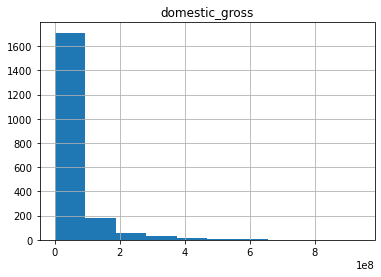

In [45]:
df2.hist(column='domestic_gross')

array([[<AxesSubplot:title={'center':'foreign_gross'}>]], dtype=object)

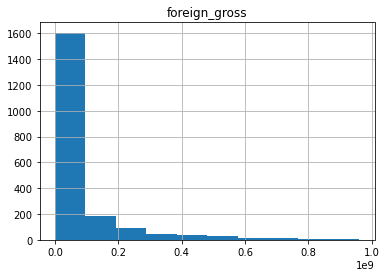

In [46]:
df2.hist(column='foreign_gross')

In [53]:
# Overall Descriptive statistics
df2.describe()

,domestic_gross,foreign_gross,year,total_gross
count,2.009000e+03,2.032000e+03,2037.000000,2.004000e+03
mean,4.697311e+07,7.505704e+07,2013.492882,1.215769e+08
std,8.159966e+07,1.375294e+08,2.592412,2.061554e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.650000e+05,3.775000e+06,2011.000000,8.117750e+06
50%,1.650000e+07,1.890000e+07,2013.000000,4.210000e+07
75%,5.600000e+07,7.505000e+07,2016.000000,1.327250e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [54]:
# Get movies with highest domestic_gross, foreign_gross, total_gross 
df2.nlargest(3, 'domestic_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015,NaN
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018,NaN


In [55]:
df2.nlargest(3, 'foreign_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09


In [56]:
df2.nlargest(3, 'total_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09


In [90]:
# Get movies made per year, create new data frame
made_year = pd.DataFrame(df2.groupby('year').title.nunique())
made_year

,title
year,
2010,314
2011,293
2012,250
2013,205
2014,238
2015,191
2016,195
2017,178
2018,173


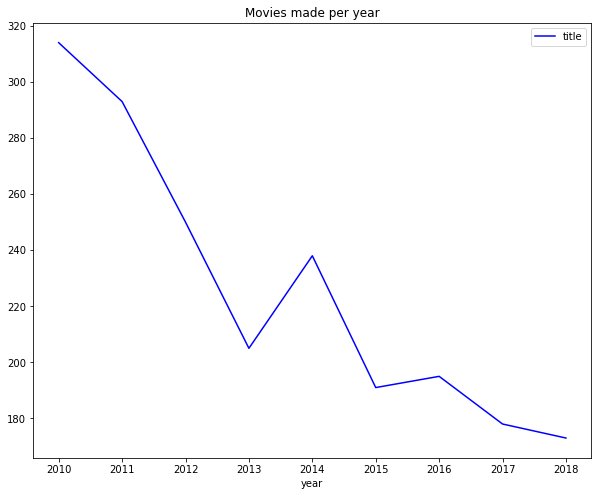

In [72]:
# Plot data, line chart for showing development over the years
made_year.plot.line(title ='Movies made per year', color='Blue',figsize=(10, 8));

# Data Set 3

In [73]:
import pandas as pd
import numpy as np
import datetime 

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [84]:
import scipy.stats
from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv
import seaborn as sns
from pandas import Series, DataFrame


In [77]:
movie_info = pd.read_csv('data/rt.movie_info.tsv', sep="\t")
movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [78]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [80]:
# Drop duplicates
movie_info.drop_duplicates(inplace=True)
# Check if done
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 158.4+ KB


In [81]:
#  Drop rows containing missing values in genre
movie_info.dropna(subset=['genre'], inplace=True)  
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1552 non-null   int64 
 1   synopsis      1495 non-null   object
 2   rating        1552 non-null   object
 3   genre         1552 non-null   object
 4   director      1360 non-null   object
 5   writer        1110 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1526 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 157.6+ KB


In [82]:
# Only keep columns that are needed for further analysis
movie_df = movie_info[['rating','genre','director', 'currency', 'runtime', 'box_office']]
movie_df

,rating,genre,director,currency,runtime,box_office
0,R,Action and Adventure|Classics|Drama,William Friedkin,NaN,104 minutes,NaN
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,$,108 minutes,"600,000"
2,R,Drama|Musical and Performing Arts,Allison Anders,NaN,116 minutes,NaN
3,R,Drama|Mystery and Suspense,Barry Levinson,NaN,128 minutes,NaN
4,NR,Drama|Romance,Rodney Bennett,NaN,200 minutes,NaN
...,...,...,...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,NaN,$,106 minutes,"33,886,034"
1556,PG,Comedy|Science Fiction and Fantasy,Steve Barron,NaN,88 minutes,NaN
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes,NaN
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,NaN,101 minutes,NaN


In [85]:
# Split genres and create a new entry for each of the genre a movie falls into
s = movie_df['genre'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movie_df['genre']
movie_split_genres = movie_df.join(s)

In [86]:
movie_split_genres.head()

,rating,director,currency,runtime,box_office,genres
0,R,William Friedkin,NaN,104 minutes,NaN,Action and Adventure
0,R,William Friedkin,NaN,104 minutes,NaN,Classics
0,R,William Friedkin,NaN,104 minutes,NaN,Drama
1,R,David Cronenberg,$,108 minutes,"600,000",Drama
1,R,David Cronenberg,$,108 minutes,"600,000",Science Fiction and Fantasy


In [87]:
# filling the $ for Nan for column currency
movie_split_genres['currency'].fillna('$', inplace=True)

In [88]:
movie_split_genres.head()

,rating,director,currency,runtime,box_office,genres
0,R,William Friedkin,$,104 minutes,NaN,Action and Adventure
0,R,William Friedkin,$,104 minutes,NaN,Classics
0,R,William Friedkin,$,104 minutes,NaN,Drama
1,R,David Cronenberg,$,108 minutes,"600,000",Drama
1,R,David Cronenberg,$,108 minutes,"600,000",Science Fiction and Fantasy


In [89]:
movie_split_genres.isnull().sum()

rating           0
director       436
currency         0
runtime         48
box_office    2849
genres           0
dtype: int64

In [ ]:
# renaming column runtime 
movie_split_genres.rename(columns={'runtime': 'Movie'})